In [ ]:
# вариант 23: (cosh(x) * sin(x)); [-0.5, 1]
# Тихомиров Юнес Б20-215
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def func(x):
  return np.cosh(x) * np.sin(x)

In [ ]:
def integral(x):
  return 0.5 * np.sinh(x) * np.sin(x) - 0.5 * np.cosh(x) * np.cos(x)

In [ ]:
def rectangular(func, x1, x2):
  return (x2 - x1) * func(x1)

def trapezoid(func, x1, x2):
  return 0.5 * (func(x1) + func(x2)) * (x2 - x1)

def simpson(func, x1, x2):
  return (x2 - x1) * (func(x1) + 4 * func(0.5 * (x1 + x2)) + func(x2)) / 6

In [ ]:
a = - 0.5
b = 1

In [ ]:
hNewList = []
maxErrorSimpsons = []
maxErrorRectangular = []
maxErrorTrapezoid = []
analytic_integral = integral(b) - integral(a)

for k in range (50, 250): # number of nodes
  hNew = (b - a) / (k - 1) # step
  hNewList.append(np.log(hNew)) # log step

  nodes = np.arange(a, b + hNew, hNew) 

  simpsons_integral = 0
  rectangular_integral = 0
  trapezoid_integral = 0
  errorSimpsons = []
  errorRectangular = []
  errorTrapezoid = []

  for i in range(0, k - 2): # evaluating integral value and error
    simpsons_integral += simpson(func, nodes[i], nodes[i + 1])
    errorSimpsons.append(abs(simpson(func, nodes[i], nodes[i + 1]) - (integral(nodes[i + 1]) - integral(nodes[i]))))

    rectangular_integral += rectangular(func, nodes[i], nodes[i + 1])
    errorRectangular.append(abs(rectangular(func, nodes[i], nodes[i + 1]) - (integral(nodes[i + 1]) - integral(nodes[i]))))

    trapezoid_integral += trapezoid(func, nodes[i], nodes[i + 1])
    errorTrapezoid.append(abs(trapezoid(func, nodes[i], nodes[i + 1]) - (integral(nodes[i + 1]) - integral(nodes[i]))))

  maxErrorSimpsons.append(np.log(max(errorSimpsons)))
  maxErrorRectangular.append(np.log(max(errorRectangular)))
  maxErrorTrapezoid.append(np.log(max(errorTrapezoid)))

print("Analytic integral: ", analytic_integral)
print("Numeric integral with Simpson method: ", simpsons_integral)
print("Numeric integral with Rectangular method: ", rectangular_integral)
print("Numeric integral with Trapezoid method: ", trapezoid_integral)



Analytic integral:  0.44746308326558715
Numeric integral with Simpson method:  0.43964280091706764
Numeric integral with Rectangular method:  0.4341161193350923
Numeric integral with Trapezoid method:  0.4396445554715168


**Графики логарифма максимальной ошибки от логарифма шага**


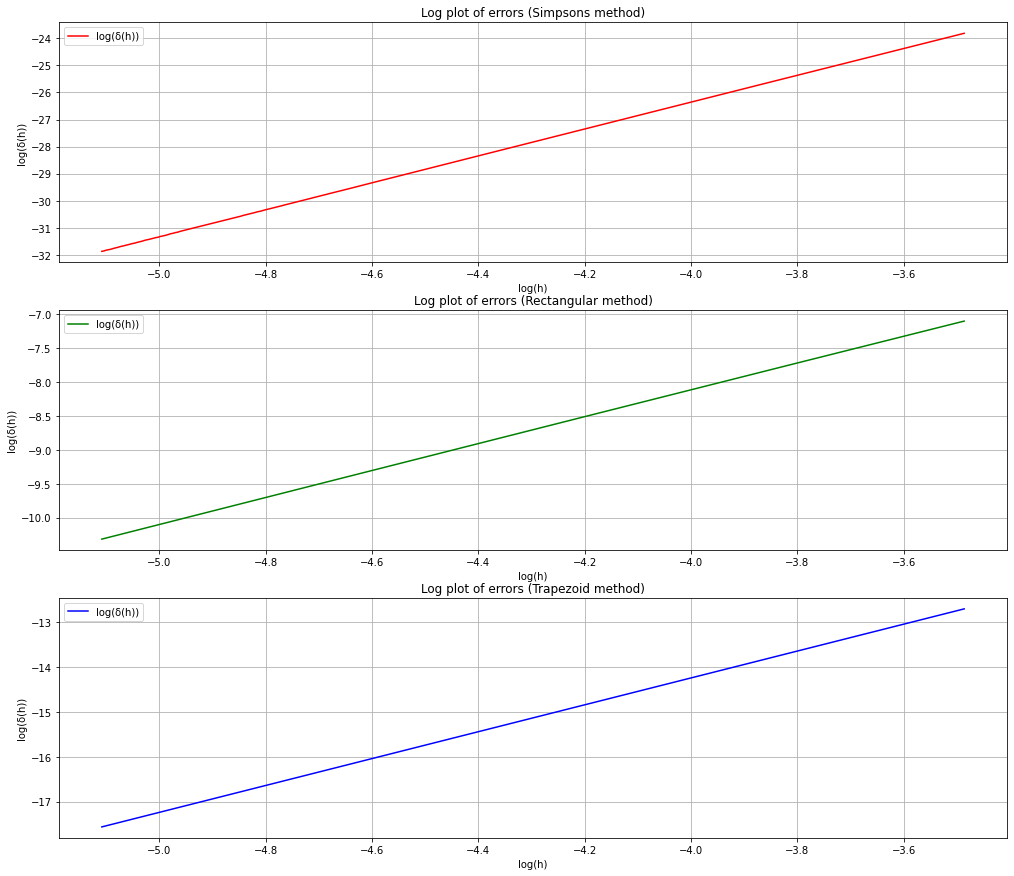

k =  4.966505413694635  for Simspons method
k =  1.9819280649613265  for Rectangular method
k =  2.9997254159843423  for Trapezoid method


In [ ]:
fig, axs = plt.subplots(3, figsize = (17, 15))
axs[0].plot(hNewList, maxErrorSimpsons, color = 'r', label = 'log(δ(h))')
axs[0].set_title("Log plot of errors (Simpsons method)")
axs[1].plot(hNewList, maxErrorRectangular, color = 'g', label = 'log(δ(h))')
axs[1].set_title("Log plot of errors (Rectangular method)")
axs[2].plot(hNewList, maxErrorTrapezoid, color = 'b', label = 'log(δ(h))')
axs[2].set_title("Log plot of errors (Trapezoid method)")

for ax in axs:
  ax.set_xlabel("log(h)")
  ax.set_ylabel("log(δ(h))")
  ax.legend()
  ax.grid(True)
plt.show()

kSimpson = (maxErrorSimpsons[-1] - maxErrorSimpsons[0]) / (hNewList[-1] - hNewList[0])
print("k = ", kSimpson, " for Simspons method")

kRectangular = (maxErrorRectangular[-1] - maxErrorRectangular[0]) / (hNewList[-1] - hNewList[0])
print("k = ", kRectangular, " for Rectangular method")

kTrapezoid = (maxErrorTrapezoid[-1] - maxErrorTrapezoid[0]) / (hNewList[-1] - hNewList[0])
print("k = ", kTrapezoid, " for Trapezoid method")
